[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_6/Lecture_6_2.ipynb)

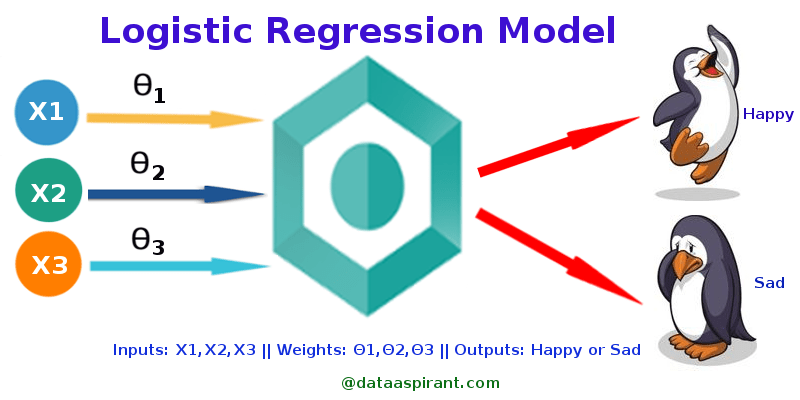

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category. 

### Task
The objective is to classify according to the altitude above sea level, the balance and aftertaste of the cup of coffee if that specific coffee was grown in Colombia, Taiwan, or Guatemala. These three countries have been chosen because they have similar coffee quality levels but different environmental contexts. The data is hardly separable for the three countries, especially Colombia and Guatemala. Initially, these two countries will be analyzed; later, the original three countries with the three elements mentioned (altitude, balance, and aftertaste), and two more (Aroma and body) to see if the classification accuracy would increase. The Logistic regression algorithm by scikit-learn library is used. The classification indicators and the confusion matrix are used as quality indicators.

### Cool Coffee facts. Arabiga o Robusta?

There are tow subspecies of coffee tree: arabiga and Robusta. Arabica coffee comes from the beans of a Coffea arabica plant, which originated in Ethiopia. Arabica is the world's most popular coffee type, equating to over 60% of cups drank. Robusta Coffee is coffee made from the beans of the Coffea canephora plant, the origins of which are in Africa. Robusta coffee is notoriously bitter and is used primarily in instant coffee, espresso, and as a filler in certain blends of ground coffee. The major differences are:

1.  Robusta has an oatmeal-like taste, somewhere between neutral and harsh. Unroasted Robusta beans smell sort of raw-peanutty.  Arabicas, on the other hand, have an extensive taste range (depending on its varietal). The range differs from sweet-soft to sharp-tangy. When unroasted, Arabica beans smell like blueberries. Their roasted smell is described as perfumey with notes of fruit and sugar tones.

2. Robusta coffee beans come from a resilient plant that can be grown at low altitudes of 200-800 meters. Robusta beans aren't very susceptible to pests' damage, and they produce more finished products per acre and require relatively low production costs.  Contrariwise, Arabica coffee beans are fragile and must grow in cool, subtropical climates. Arabica beans also need a lot of moisture, rich soil, shade, and sun. Because of their fragility, Arabica beans are vulnerable to attack from various pests and can be damaged by cold temperatures or poor handling. This type of bean also needs to be grown at a higher elevation (600-2000 meters).

3. Robusta is much cheaper than Arabica, but it is also worse for the environment and your taste buds. Robusta fosters use mono-cropping, the practice of growing the same plant every year in one place. This process yields more space since it involves clear-cutting the forest for the crop. Because Robusta is a more resilient plant than the delicate Arabica, it can be grown in more places, leading to large companies purchasing vast amounts of the rainforest, clear-cutting the land, and planting Robusta beans. 

But the main difference that we all care about is the fact that Arabica coffee tastes better than a cup of Robusta! Although it's more expensive, it's definitely worth it if you want to start your morning with the right feet

In [2]:
#List of libraries used in the proyect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

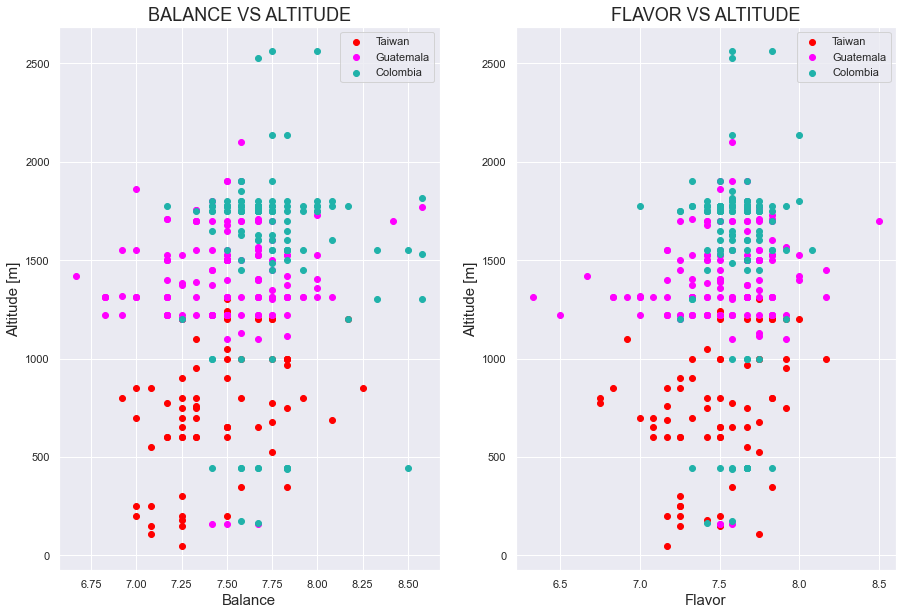

In [3]:
# Set theme for plotting
sns.set_theme()

# Import the data
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country', 'Total.Cup.Points':'Total_points'}, inplace = True)

# Plot the data
countries = ["Taiwan", "Guatemala","Colombia"]
colors = ["red", "magenta", "lightseagreen"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

for country, color in zip(countries, colors):
    temp_df = cafe[cafe.Country == country]
    ax1.scatter(temp_df.Balance,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    ax2.scatter(temp_df.Flavor,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    
ax1.set_xlabel("Balance", fontsize = 15)
ax1.set_ylabel("Altitude [m]", fontsize = 15)
ax1.set_title("BALANCE VS ALTITUDE", fontsize = 18)
ax1.legend()
ax2.set_xlabel("Flavor", fontsize = 15)
ax2.set_ylabel("Altitude [m]", fontsize = 15)
ax2.set_title("FLAVOR VS ALTITUDE", fontsize = 18)
ax2.legend()
plt.show()

Data is hardly separable for balance, afteraste and altitud, making the classificatio a dificul task. 

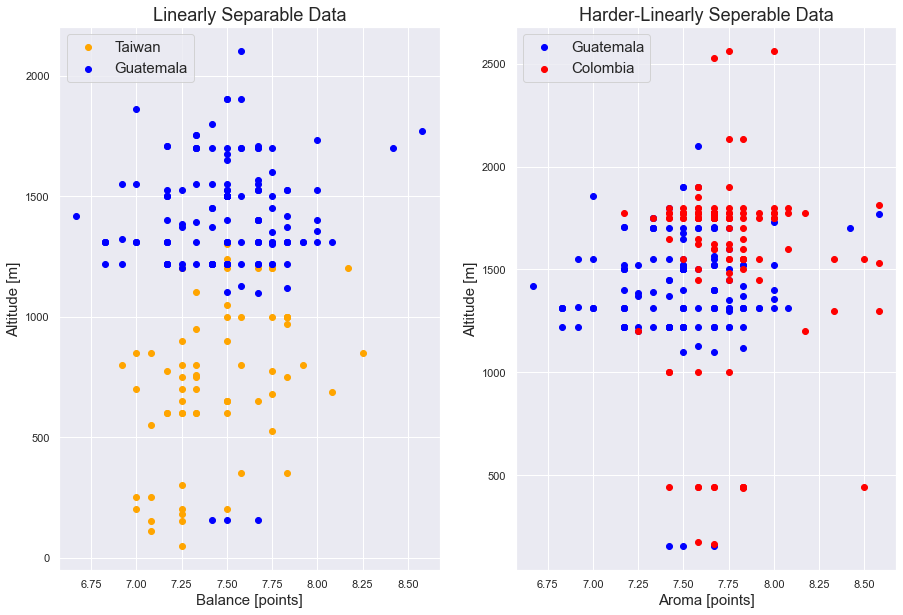

In [5]:
colombia = cafe[cafe.Country == "Colombia"]
taiwan = cafe[cafe.Country == "Taiwan"]
guatemala = cafe[cafe.Country == "Guatemala"]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(taiwan.Balance, 
            taiwan.altitude_mean_meters, 
            color = "orange", 
            label = "Taiwan")
ax1.scatter(guatemala.Balance, 
            guatemala.altitude_mean_meters, 
            color = "blue", 
            label = "Guatemala")
ax1.set_xlabel("Balance [points]", fontsize = 15)
ax1.set_ylabel("Altitude [m]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Separable Data", fontsize = 18)

ax2.scatter(guatemala.Balance, 
            guatemala.altitude_mean_meters, 
            color = "blue", 
            label = "Guatemala")
ax2.scatter(colombia.Balance, 
            colombia.altitude_mean_meters, 
            color = "red", 
            label = "Colombia")
ax2.set_xlabel("Aroma [points]", fontsize = 15)
ax2.set_ylabel("Altitude [m]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Harder-Linearly Seperable Data", fontsize = 18)
plt.show()

# Clasification using Logistic regression 

### Colombia-Guatemala

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression



In [6]:
values=['Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X1 = cafe_filter[[ 'Flavor', 'Balance','altitude_mean_meters']]
y1 = cafe_filter['Country']


In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=42)
logistic1 = LogisticRegression()
logistic1.fit(X1_train, y1_train)
print ("Train - Accuracy :", metrics.accuracy_score(y1_train,logistic1.predict(X1_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test,logistic1.predict(X1_test)))


Train - Accuracy : 0.774869109947644
Test - Accuracy : 0.7682926829268293


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 5 elements')

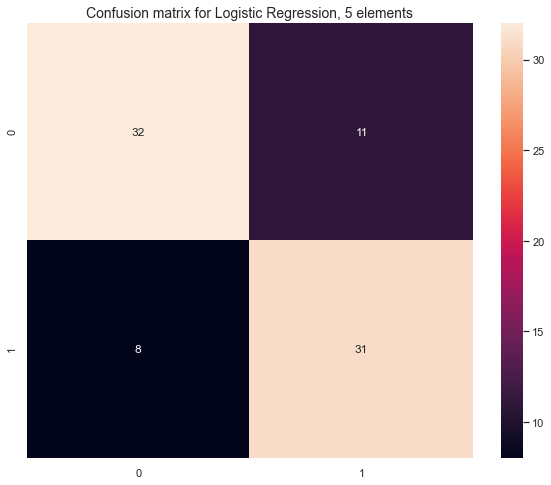

In [10]:
y1_pred = logistic1.predict(X1_test)
fig = plt.figure(figsize = (10,8))
cm1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm1,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 5 elements',fontsize=14)

In [11]:
cr1 = classification_report(y1_test, y1_pred, target_names=['Colombia','Guatemala'])
print(cr1)

              precision    recall  f1-score   support

    Colombia       0.80      0.74      0.77        43
   Guatemala       0.74      0.79      0.77        39

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.77      0.77      0.77        82



#### Using five elements (Aditional Aroma and aftertaste)


In [18]:
values=['Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X2 = cafe_filter[['Balance','altitude_mean_meters', 'Aftertaste', 'Aroma', 'Flavor']]
y2 = cafe_filter['Country']


In [19]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)
logistic2 = LogisticRegression()
logistic2.fit(X2_train, y2_train)
print ("Train - Accuracy :", metrics.accuracy_score(y2_train,logistic2.predict(X2_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y2_test,logistic2.predict(X2_test)))


Train - Accuracy : 0.7643979057591623
Test - Accuracy : 0.7560975609756098


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 2 elements')

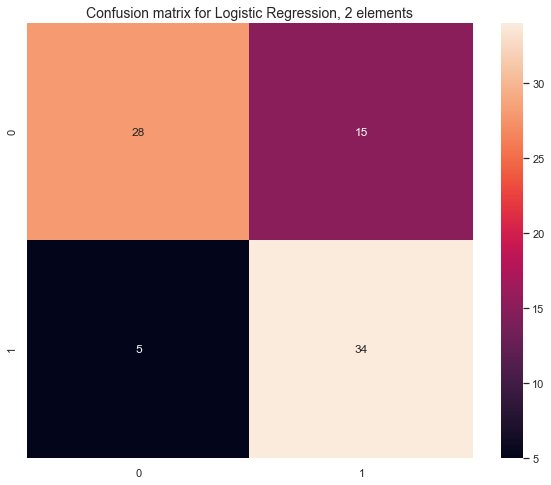

In [16]:
y2_pred = logistic2.predict(X2_test)
fig = plt.figure(figsize = (10,8))
cm2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm2,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 2 elements',fontsize=14)


In [20]:
cr2 = classification_report(y2_test, y2_pred, target_names=['Colombia','Guatemala'])
print(cr2)

              precision    recall  f1-score   support

    Colombia       0.85      0.65      0.74        43
   Guatemala       0.69      0.87      0.77        39

    accuracy                           0.76        82
   macro avg       0.77      0.76      0.75        82
weighted avg       0.77      0.76      0.75        82



#### Result

The logistic regression algorithm obtained a classification accuracy of 77%. By increasing the classification items from 3 to 5, the accuracy dropped to 75%. The fluctuations of the two additional elements for each country cause the algorithm to reduce its efficiency.

### Guatemala Taiwan and Colombia

In [23]:
values=['Guatemala','Taiwan', 'Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X3 = cafe_filter[['Flavor', 'Balance','altitude_mean_meters']]
y3 = cafe_filter['Country']


In [24]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,random_state=42)
logistic3 = LogisticRegression()
logistic3.fit(X3_train, y3_train)
print ("Train - Accuracy :", metrics.accuracy_score(y3_train,logistic3.predict(X3_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y3_test,logistic3.predict(X3_test)))


Train - Accuracy : 0.7394957983193278
Test - Accuracy : 0.7378640776699029


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 5 elements')

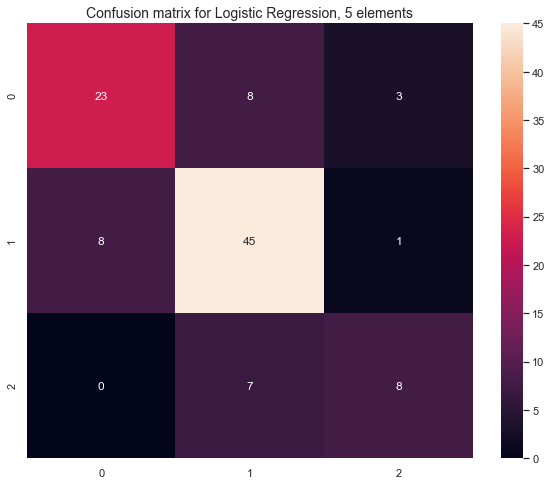

In [25]:
y3_pred = logistic3.predict(X3_test)
fig = plt.figure(figsize = (10,8))
cm3 = confusion_matrix(y3_test, y3_pred)
sns.heatmap(cm3,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 5 elements',fontsize=14)

In [26]:
cr3 = classification_report(y3_test, y3_pred, target_names=['Guatemala','Taiwan', 'Colombia' ])
print(cr3)

              precision    recall  f1-score   support

   Guatemala       0.74      0.68      0.71        34
      Taiwan       0.75      0.83      0.79        54
    Colombia       0.67      0.53      0.59        15

    accuracy                           0.74       103
   macro avg       0.72      0.68      0.70       103
weighted avg       0.74      0.74      0.73       103



#### Using 5 elements (Aditional Aroma and Aftertaste)

In [32]:
values=['Guatemala','Taiwan', 'Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X4 = cafe_filter[['Aftertaste', 'Balance','altitude_mean_meters', 'Aroma', 'Flavor']]
y4 = cafe_filter['Country']



In [33]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,random_state=42)
logistic4 = LogisticRegression()
logistic4.fit(X4_train, y4_train)
print ("Train - Accuracy :", metrics.accuracy_score(y4_train,logistic4.predict(X4_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y4_test,logistic4.predict(X4_test)))

Train - Accuracy : 0.7689075630252101
Test - Accuracy : 0.7087378640776699


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 2 elements')

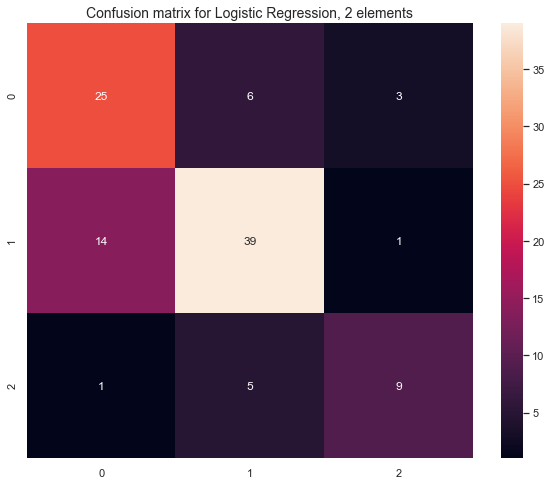

In [34]:
y4_pred = logistic4.predict(X4_test)
fig = plt.figure(figsize = (10,8))
cm4 = confusion_matrix(y4_test, y4_pred)
sns.heatmap(cm4,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 2 elements',fontsize=14)

### Result
the logistic regression algorithm obtained a classification accuracy of 72%. By increasing the classification items from 3 to 5, the accuracy dropped to 70%. In general, the best estimate of classification is in the order of 78% for this algorithm. When there are elements that are not easily separable, logistic regression presents difficulties in correctly classifying the country of origin of the cup of coffee that we seek to predict. This implies that so far, the KNN algorithm is the one that delivers the best results for the classification. 